# DS 3000 HW 6

Due: Friday July 26th @ 11:59 PM EST

### Submission Instructions
Submit this `ipynb` file to Gradescope (this can also be done via the assignment on Canvas).  To ensure that your submitted files represent your latest code, make sure to give a fresh `Kernel > Restart & Run All` just before uploading the files to gradescope.

### Tips for success
- Start early
- Make use of Piazza
- Make use of Office hour
- Remember to use cells and headings to make the notebook easy to read (if a grader cannot find the answer to a problem, you will receive no points for it)
- Under no circumstances may one student view or share their ungraded homework or quiz with another student [(see also)](http://www.northeastern.edu/osccr/academic-integrity), though you are welcome to **talk about** (not show each other) the problems.

# Get to Know You

This HW deals with a Get-to-Know-You pseudo results. Please download the `unclean_gtky.csv` file for use on this homework. **NOTE: this is not the same `cleaner_gtky.csv` that we used in class, it is a new, less clean version!**.

## Pseudonymizing data

It's often the case that we 'Pseudonymize' (use random fake pseudonyms instead of personally identifiable information) a dataset by storing a code which maps some sensitive information to a consistent tag.

| Timestamp      | Fake Student ID | What year/class are you in? | Have you done a co-op during your time at Northeastern? | How would you rate your experience programming on a scale of 0-10, where 0 is (No Experience) and 10 is (Proficient in at least one language) | Which language(s) have you had at least some experience programming in? (Choose all that apply) | What is your age (in months)? For example, if you turned 20 in July of this year, you would be (20\*12 + 2) = 242 months old. | What is your ideal starting salary (in thousands of USD)? (Try to be reasonable!) |
| -------------- | --------------- | --------------------------- | ------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------- |
| 09-09-22 15:37 | 7289            | Sophomore                   | No                                                      | 9                                                                                                                                             | Python, Other(s)                                                                                | 234                                                                                                                           | 60                                                                                |
| 09-09-22 16:01 | 36              | Sophomore                   | No                                                      | 7                                                                                                                                             | Python                                                                                          | 233                                                                                                                           | 100                                                                               |
| 09-09-22 14:19 | 2676            | Junior                      | Yes                                                     | 7                                                                                                                                             | Python, Java, C/C++                                                                             | 252                                                                                                                           | 70                                                                                |
| 09-09-22 16:07 | 3848            | Junior                      | No                                                      | 7                                                                                                                                             | Python, Java                                                                                    | 243                                                                                                                           | 50                                                                                |
| 09-09-22 16:06 | 2755            | Sophomore                   | No                                                      | 5                                                                                                                                             | Python, R                                                                                       | 231                                                                                                                           | 90                                                                                |
| 09-09-22 15:27 | 3724            | Junior                      | No                                                      | 8                                                                                                                                             | Python, Java                                                                                    | 245                                                                                                                           | 70                                                                                |
| 09-09-22 14:16 | 9619            | Senior                      | Yes                                                     | 7                                                                                                                                             | Python                                                                                          | 258                                                                                                                           | 90                                                                                |
| 09-09-22 16:06 | 9935            | Fifth year                  | Yes                                                     | 3                                                                                                                                             | Java, Other(s)                                                                                  | 264                                                                                                                           |                                                                                   |

To protect student privacy, this data has already been pseudonymized by creating a `Fake Student ID` column with random numbers.

Note that there is a difference between:
- **pseudonymization** (changing everyone's name to a pseudonym)
- **anonymization**  (ensuring no individual can be uniquely identified within the data)

### Generating a pseudonym

[Universally Unique Identifiers](https://en.wikipedia.org/wiki/Universally_unique_identifier) is a CS term for a unique name:

In [1]:
from uuid import uuid4

# a good random pseudonym/alias
str(uuid4())

'4650a2e0-a360-4b5d-a4ce-66928c6135e1'

In [2]:
# a good enough random alias for us (doesn't need to be as long to be unique)
str(uuid4())[:6]

'f3edd2'

You can read more about the process in the [python docs for uuid4()](https://docs.python.org/3/library/uuid.html#uuid.uuid4) but its sufficient to know that there are so many unique output strings of `uuid4()` that we can assume no two calls return the same id.

## Part 1: 20 points

Pseudonymize `df_gtky` (again; since I already did it once) by completing the tasks below:

1. Load `unclean_gtky.csv` to a DataFrame
1. Write a `pseudonymize_col()` function which:
    * accepts a DataFrame and the name of one of its columns
    * returns `pseudo_map_dict`
        - keys are the unique items observed in original column of dataframe
        - values are the new pseudonyms
    * operates `inplace` by modifying the input DataFrame to replacing each item in the given column with its corresponding pseudonym
    
Note that the pseudonymization must be consistent: all observations of a particular student ID in the original DataFrame are replaced with an identical pseudonym.

1. call `pseudonymize_col()` and save the resulting `df_gtky` as `cleaner_gtky_anon.csv`

[This example](https://colab.research.google.com/drive/1VdikAnXZEBx3tGxclDG-BC-psr_D_DBN?usp=sharing) may help clarify the expected behavior of `pseudonymize_col()`.

Notice that we save `pseudo_map_dict` to ensure the pseudonymiazation can be undone.  What if some medical study uncovers a health problem with a participant and must contact them?  A study should be able to "undo" the pseudonymization to recover the original participants identity.

In [3]:
import pandas as pd

df_gtky = pd.read_csv('unclean_gtky.csv')


def pseudonymize_col(df, col):
    ''' Pseudonymize a column in the dataframe

    Args: 
        df: data frame
        col (str): name of column

    Returns:
        pseudo_map_dict(): a dictionary apping orginal values to the new pseudonyms
    '''
    unique = df[col].unique()
    pseudo_map_dict = {original: f'pseudo_{i}' 
                       for i, original in enumerate(unique)}
    df[col] = df[col].map(pseudo_map_dict)
    
    return pseudo_map_dict

pseudo_map_dict = pseudonymize_col(df_gtky, 'Fake Student ID')
df_gtky.to_csv('cleaner_gtky_anon.csv', index=False)


## Part 2: Data cleaning

The dataframe, so far, looks something like (note your `Fake Student ID` column will look different because of randomness):

| Timestamp      | Fake Student ID | What year/class are you in? | Have you done a co-op during your time at Northeastern? | How would you rate your experience programming on a scale of 0-10, where 0 is (No Experience) and 10 is (Proficient in at least one language) | Which language(s) have you had at least some experience programming in? (Choose all that apply) | What is your age (in months)? For example, if you turned 20 in July of this year, you would be (20\*12 + 2) = 242 months old. | What is your ideal starting salary (in thousands of USD)? (Try to be reasonable!) |
| -------------- | --------------- | --------------------------- | ------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------- |
| 09-09-22 15:37 | b35601          | Sophomore                   | No                                                      | 9                                                                                                                                             | Python, Other(s)                                                                                | 234                                                                                                                           | 60                                                                                |
| 09-09-22 16:01 | ea9cad          | Sophomore                   | No                                                      | 7                                                                                                                                             | Python                                                                                          | 233                                                                                                                           | 100                                                                               |
| 09-09-22 14:19 | 98924b          | Junior                      | Yes                                                     | 7                                                                                                                                             | Python, Java, C/C++                                                                             | 252                                                                                                                           | 70                                                                                |
| 09-09-22 16:07 | b3a188          | Junior                      | No                                                      | 7                                                                                                                                             | Python, Java                                                                                    | 243                                                                                                                           | 50                                                                                |
| 09-09-22 16:06 | e723a1          | Sophomore                   | No                                                      | 5                                                                                                                                             | Python, R                                                                                       | 231                                                                                                                           | 90                                                                                |

There are a few data cleaning steps we need to take in order to make it more readable and easier to use. When we are done, we should have a clean data set which looks like this:

|   | student\_id | class     | co-op | prog\_exp | age | start\_sal | datetimestamp  | python | java  | r     | c/c++ | other(s) |
| - | ----------- | --------- | ----- | --------- | --- | ---------- | -------------- | ------ | ----- | ----- | ----- | -------- |
| 0 | 9bef30      | Sophomore | FALSE | 9         | 234 | 60         | 09-09-22 15:37 | TRUE   | FALSE | FALSE | FALSE | TRUE     |
| 1 | 03447c      | Sophomore | FALSE | 7         | 233 | 100        | 09-09-22 16:01 | TRUE   | FALSE | FALSE | FALSE | FALSE    |
| 2 | 8fe0cf      | Junior    | TRUE  | 7         | 252 | 70         | 09-09-22 14:19 | TRUE   | TRUE  | FALSE | TRUE  | FALSE    |
| 3 | 5d8693      | Junior    | FALSE | 7         | 243 | 50         | 09-09-22 16:07 | TRUE   | TRUE  | FALSE | FALSE | FALSE    |
| 4 | 5e28fe      | Sophomore | FALSE | 5         | 231 | 90         | 09-09-22 16:06 | TRUE   | FALSE | TRUE  | FALSE | FALSE    |

### Part 2.1 (8 points)

Rename the columns so that they are:
- timestamp
- student_id
- class
- co-op
- prog_exp
- lang_exp
- age
- start_sal

In [4]:
# df_gtky

df_gtky = pd.read_csv('unclean_gtky.csv')

df_gtky.rename(columns={
    'Timestamp': 'timestamp',
    'Fake Student ID': 'student_id',
    'What year/class are you in?': 'class',
    'Have you done a co-op during your time at Northeastern?': 'co-op',
    'How would you rate your experience programming on a scale of 0-10, where 0 is (No Experience) and 10 is (Proficient in at least one language)': 'prog_exp',
    'Which language(s) have you had at least some experience programming in? (Choose all that apply)': 'lang_exp',
    'What is your age (in months)? For example, if you turned 20 in July of this year, you would be (20*12 + 2) = 242 months old.': 'age',
    'What is your ideal starting salary (in thousands of USD)? (Try to be reasonable!)': 'start_sal'
}, inplace=True)

# Display the dataframe to check the changes
print(df_gtky.head())

        timestamp  student_id      class co-op  prog_exp             lang_exp  \
0  09-09-22 15:37        7289  Sophomore    No         9     Python, Other(s)   
1  09-09-22 16:01          36  Sophomore    No         7               Python   
2  09-09-22 14:19        2676     Junior   Yes         7  Python, Java, C/C++   
3  09-09-22 16:07        3848     Junior    No         7         Python, Java   
4  09-09-22 16:06        2755  Sophomore    No         5            Python, R   

     age  start_sal  
0  234.0       60.0  
1  233.0      100.0  
2  252.0       70.0  
3  243.0       50.0  
4  231.0       90.0  


### Part 2.2.1 (5 points)

The `co-op` column contains strings 'Yes' and 'No'.  `.replace()` these entries with boolens ('Yes'-> `True`, 'No' -> `False`).

In [5]:
df_gtky['co-op'] = df_gtky['co-op'].replace({'Yes': True, 'No': False})

# Display the dataframe to check the changes
print(df_gtky.head())

        timestamp  student_id      class  co-op  prog_exp  \
0  09-09-22 15:37        7289  Sophomore  False         9   
1  09-09-22 16:01          36  Sophomore  False         7   
2  09-09-22 14:19        2676     Junior   True         7   
3  09-09-22 16:07        3848     Junior  False         7   
4  09-09-22 16:06        2755  Sophomore  False         5   

              lang_exp    age  start_sal  
0     Python, Other(s)  234.0       60.0  
1               Python  233.0      100.0  
2  Python, Java, C/C++  252.0       70.0  
3         Python, Java  243.0       50.0  
4            Python, R  231.0       90.0  


C:\Users\nicho\AppData\Local\Temp\ipykernel_8416\2963711694.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_gtky['co-op'] = df_gtky['co-op'].replace({'Yes': True, 'No': False})


### Part 2.2.2 (5 points)

The `start_sal` column contains missing values. Let's assume that those who forgot to put in an ideal starting salary would like to at least make enough to live as a single adult in Massachussetts (\$45517 according to [this website](https://livingwage.mit.edu/states/25)). Replace all missing values in the `start_sal` column with `45.517`. Check `df_gtky.tail()` to check (as the last observation has a missing `start_sal` value).

In [6]:
df_gtky['start_sal'] = df_gtky['start_sal'].fillna(45.517)

df_gtky.tail()

,timestamp,student_id,class,co-op,prog_exp,lang_exp,age,start_sal
97,09-12-22 16:02,7062,Sophomore,False,5,Python,228.0,70.000
98,9/15/2022 10:36:54,3456,Sophomore,False,10,"Java, Other(s)",19.0,100.000
99,9/15/2022 14:12:59,6633,Sophomore,False,9,Java,236.0,70.000
100,9/16/2022 13:32:34,5093,Sophomore,False,3,"Python, Java",236.0,100.000
101,9/16/2022 13:38:59,3251,Sophomore,False,7,Java,228.0,45.517


### Part 2.3 (15 points)
`.map()` the `timestamp` column (containing strings) to a new `datetimestamp` column which contains `datetime` objects corresponding to the date and time given in `timestamp`.
- for example, the string `'09-09-22 15:37'` should be mapped to `datetime(year=2022, month=9, day=9, hour=15, minute=37)`
    - **be careful**: take a look at the `df_gtky.tail()` and notice that some of the `timestamp` strings are formatted differently. Make sure these are converted into the same type of datetime objects as the rest (i.e. remove the seconds from the ones that have them).
- use `DataFrame.map()` with a `convert_date()` function you implement and document

Be sure that your `convert_date()` function:
- is properly documented
    - docstring
    - comments
    - code "chunking" with whitespace
- is tested with two `assert` statements you write
    - you need two because there are two different formats for the date!
    

In [7]:
from datetime import datetime

def convert_date(date_str):
    """
    Convert a date string into a datetime object
    
    Args:
        date_str (str): A date string 
    
    Returns:
        datetime: A datetime object that representing the date and time

    """
    for fmt in ('%m-%d-%y %H:%M', '%m-%d-%y %H:%M:%S', '%m/%d/%Y %H:%M:%S'):
        try:
            return datetime.strptime(date_str, fmt)
        except ValueError:
            pass


# Tests to make sure it works
assert convert_date('09-12-22 16:02') == datetime(2022, 9, 12, 16, 2)
assert convert_date('9/15/2022 10:36:54') == datetime(2022, 9, 15, 10, 36, 54)

# Apply the function to the data
df_gtky['datetimestamp'] = df_gtky['timestamp'].map(convert_date)

df_gtky.tail()

,timestamp,student_id,class,co-op,prog_exp,lang_exp,age,start_sal,datetimestamp
97,09-12-22 16:02,7062,Sophomore,False,5,Python,228.0,70.000,2022-09-12 16:02:00
98,9/15/2022 10:36:54,3456,Sophomore,False,10,"Java, Other(s)",19.0,100.000,2022-09-15 10:36:54
99,9/15/2022 14:12:59,6633,Sophomore,False,9,Java,236.0,70.000,2022-09-15 14:12:59
100,9/16/2022 13:32:34,5093,Sophomore,False,3,"Python, Java",236.0,100.000,2022-09-16 13:32:34
101,9/16/2022 13:38:59,3251,Sophomore,False,7,Java,228.0,45.517,2022-09-16 13:38:59


### Part 2.4 (20 points)

The data encoding in columns `lang_exp` is not convenient. We would like the column:

| lang_exp            |
|---------------------|
| Python, Other(s)    |
| Python              |
| Python, Java, C/C++ |
| Python, Java        |
| Python, R           |

To be turned into five columns (`python`, `java`, `r`, `c/c++`, `other(s)`) that are all boolean values of `True` or `False` depending on if a student has any experience in that programming language:

| python | java  | r     | c/c++ | other(s) |
|--------|-------|-------|-------|----------|
| True   | False | False | False | True     |
| True   | False | False | False | False    |
| True   | True  | False | True  | False    |
| True   | True  | False | False | False    |
| True   | False | True  | False | False    |

Write two functions:
- `clean_lang()`: which takes a single observation (string) and outputs a series with keys equal to the column names of your desired new columns, and appropriate boolean values. 
- `get_lang_df()`: which uses `.map` to create the new columns and add them to the data frame. 

For both of the functions you create:
- be sure it is properly documented:
    - docstring
    - commenets
    - code "chunking" with whitespace
- (for at least `clean_lang()`) be sure it is properly tested
    - `assert` a few strings as in the rows above to ensure the function(s) work
    
**Hint:** We did something not too dissimilar on HW 4, but note that you may want to begin by capitalizing certain letters of the keys in your dictionary; you can convert them to lowercase at the end of your `get_lang_df()` function.

In [8]:
def clean_lang(lang_str):
    """
    Takes a single observation (string) and outputs a series with keys equal to the column names of your desired new columns, and appropriate boolean values. 
    
    Parameters:
        lang_str (str): A string containing programming languages separated by commas.
    
    Returns:
        programing_langs: A dictionary with keys as the languages and the boolean value if it is present or not 
    """
    # Initializes a dictionary to store if any of the languages are present
    programing_langs = {'python': False, 'java': False, 'r': False, 'c/c++': False, 'other(s)': False}
    
    # Checks to see if the language is present and sets the dictionary boolean to true
    if 'Python' in lang_str:
        programing_langs['python'] = True
    if 'Java' in lang_str:
        programing_langs['java'] = True
    if 'R' in lang_str:
        programing_langs['r'] = True
    if 'C/C++' in lang_str:
        programing_langs['c/c++'] = True
    if 'Other(s)' in lang_str:
        programing_langs['other(s)'] = True
    
    return programing_langs

# Assert test for clean_lang
assert clean_lang('Python, Other(s)') == {'python': True, 'java': False, 'r': False, 'c/c++': False, 'other(s)': True}
assert clean_lang('Python, Java, C/C++') == {'python': True, 'java': True, 'r': False, 'c/c++': True, 'other(s)': False}
assert clean_lang('Python') == {'python': True, 'java': False, 'r': False, 'c/c++': False, 'other(s)': False}

def get_lang_df(df):
    """
    Uses `.map` to create the new columns and add them to the data frame. 
    
    Parameters:
    df (pd.DataFrame): The dataframe input with the lang_exp column in it 
    
    Returns:
    pd.DataFrame: A new dataframe with new columns representing each language and their boolean value 
    """
    # Uses clean_lang in order to add new columns to the dataframe
    lang_df = df['lang_exp'].map(clean_lang).apply(pd.Series)
    
    # Adds the new columns to the dataframe
    df = df.join(lang_df)
    
    return df

# Updates the dataframe and prints it 
df_gtky = get_lang_df(df_gtky)
df_gtky.head()

,timestamp,student_id,class,co-op,prog_exp,lang_exp,age,start_sal,datetimestamp,python,java,r,c/c++,other(s)
0,09-09-22 15:37,7289,Sophomore,False,9,"Python, Other(s)",234.0,60.0,2022-09-09 15:37:00,True,False,False,False,True
1,09-09-22 16:01,36,Sophomore,False,7,Python,233.0,100.0,2022-09-09 16:01:00,True,False,False,False,False
2,09-09-22 14:19,2676,Junior,True,7,"Python, Java, C/C++",252.0,70.0,2022-09-09 14:19:00,True,True,False,True,False
3,09-09-22 16:07,3848,Junior,False,7,"Python, Java",243.0,50.0,2022-09-09 16:07:00,True,True,False,False,False
4,09-09-22 16:06,2755,Sophomore,False,5,"Python, R",231.0,90.0,2022-09-09 16:06:00,True,False,True,False,False


### Part 2.5 (10 points)

Finally, 
- delete the two columns which are redundant with our cleaner format: 'timestamp' and 'lang_exp'
    - You can delete a DataFrame column (inplace) with:
``` python
   del data_frame[col]
```
- add the five new columns
    - You can add two DataFrame objects together using `pd.concat`:
```python
    new_df = pd.concat([old_df, new_cols], axis = 1)
```

Then, save this final cleaned data frame as `final_gtky.csv` **and attach it with your Gradescop submission**.

In [9]:
# delete the two columns 'timestamp' and 'lang_exp'
del df_gtky['timestamp']
del df_gtky['lang_exp']



In [10]:
print(df_gtky.head())

# saves the new dataframe as 'final_gtky.csv'
# Already added the five new columns in the previous parts of the question so the data frame already has them and is updated
df_gtky.to_csv('final_gtky.csv', index=False) 

   student_id      class  co-op  prog_exp    age  start_sal  \
0        7289  Sophomore  False         9  234.0       60.0   
1          36  Sophomore  False         7  233.0      100.0   
2        2676     Junior   True         7  252.0       70.0   
3        3848     Junior  False         7  243.0       50.0   
4        2755  Sophomore  False         5  231.0       90.0   

        datetimestamp  python   java      r  c/c++  other(s)  
0 2022-09-09 15:37:00    True  False  False  False      True  
1 2022-09-09 16:01:00    True  False  False  False     False  
2 2022-09-09 14:19:00    True   True  False   True     False  
3 2022-09-09 16:07:00    True   True  False  False     False  
4 2022-09-09 16:06:00    True  False   True  False     False  


# Part 3: Summarize and Visualize Data

With our new clean data set, let us ask some questions that we may be able to answer with some basic data summaries or plots.

In [11]:
df_gtky.head()

,student_id,class,co-op,prog_exp,age,start_sal,datetimestamp,python,java,r,c/c++,other(s)
0,7289,Sophomore,False,9,234.0,60.0,2022-09-09 15:37:00,True,False,False,False,True
1,36,Sophomore,False,7,233.0,100.0,2022-09-09 16:01:00,True,False,False,False,False
2,2676,Junior,True,7,252.0,70.0,2022-09-09 14:19:00,True,True,False,True,False
3,3848,Junior,False,7,243.0,50.0,2022-09-09 16:07:00,True,True,False,False,False
4,2755,Sophomore,False,5,231.0,90.0,2022-09-09 16:06:00,True,False,True,False,False


### Part 3.1 (12 points)

Calculate and compare for `'co-op' = True` vs. `'co-op' = False`:
    - the mean, median, and variance of `prog_exp`
    - the mean, median, and variance of `age`
Calculate and compare for `'python' = True` vs. `'python' = False`:
    - the mean, median, and variance of `prog_exp`
    - the mean, median, and variance of `age`

Note that this means you are going to be calculating **eight** means, medians and variances. Keep track of which numbers represent which statistics. Then **in a markdown cell** provide *at least* 3-4 sentences discussing what conclusions you may be able to draw from these statistics.

In [12]:
import pandas as pd

# Calculations for been on co-op and have not been on co-op
yes_coop = df_gtky[df_gtky['co-op'] == True]
no_coop = df_gtky[df_gtky['co-op'] == False]

# Mean, median, and variance for 'prog_exp' and been on co-op
mean_prog_exp_yes_coop = yes_coop['prog_exp'].mean()
median_prog_exp_yes_coop = yes_coop['prog_exp'].median()
var_prog_exp_yes_coop = yes_coop['prog_exp'].var()

print('Stats For Rating Their Programming Experience Given They Been On Co-Op')
print(f"Mean: {mean_prog_exp_yes_coop}")
print(f"Median: {median_prog_exp_yes_coop}")
print(f"Variance: {var_prog_exp_yes_coop}")

# Mean, median, and variance for 'prog_exp' with no co-op
mean_prog_exp_no_coop = no_coop['prog_exp'].mean()
median_prog_exp_no_coop = no_coop['prog_exp'].median()
var_prog_exp_no_coop = no_coop['prog_exp'].var()

print('')
print('Stats For Rating Their Programming Experience Given They Have Not Been On Co-Op')
print(f"Mean: {mean_prog_exp_no_coop}")
print(f"Median: {median_prog_exp_no_coop}")
print(f"Variance: {var_prog_exp_no_coop}")

# Mean, median, and variance for 'age' and been on co-op
mean_age_yes_coop = yes_coop['age'].mean()
median_age_yes_coop = yes_coop['age'].median()
var_age_yes_coop = yes_coop['age'].var()

print('')
print('Stats For Age given they been on co-op')
print(f"Mean: {mean_age_yes_coop}")
print(f"Median: {median_age_yes_coop}")
print(f"Variance: {var_age_yes_coop}")

# Mean, median, and variance for 'age' and not been on co-op
mean_age_no_coop = no_coop['age'].mean()
median_age_no_coop = no_coop['age'].median()
var_age_no_coop = no_coop['age'].var()

print('')
print('Stats For Age given they have not been on co-op')
print(f"Mean: {mean_age_no_coop}")
print(f"Median: {median_age_no_coop}")
print(f"Variance: {var_age_no_coop}")


print('')
print('')
# Calculations for knowing python and not knowing python
python_true = df_gtky[df_gtky['python'] == True]
python_false = df_gtky[df_gtky['python'] == False]

# Mean, median, and variance for 'prog_exp' with knowing python
mean_prog_exp_yes_python = python_true['prog_exp'].mean()
median_prog_exp_yes_python = python_true['prog_exp'].median()
var_prog_exp_yes_python = python_true['prog_exp'].var()

print('Stats For Rating Their Programming Experience Given They Know Python')
print(f"Mean: {mean_prog_exp_yes_python}")
print(f"Median: {median_prog_exp_yes_python}")
print(f"Variance: {var_prog_exp_yes_python}")


# Mean, median, and variance for 'prog_exp' with not knowing python
mean_prog_exp_no_python = python_false['prog_exp'].mean()
median_prog_exp_no_python = python_false['prog_exp'].median()
var_prog_exp_no_python = python_false['prog_exp'].var()

print('')
print('Stats For Rating Their Programming Experience Given They Do Not Know Python')
print(f"Mean: {mean_prog_exp_no_python}")
print(f"Median: {median_prog_exp_no_python}")
print(f"Variance: {var_prog_exp_no_python}")

# Mean, median, and variance for 'age' with knowing python
mean_age_yes_python = python_true['age'].mean()
median_age_yes_python = python_true['age'].median()
var_age_yes_python = python_true['age'].var()

print('')
print('Stats For Age given they know Python')
print(f"Mean: {mean_age_yes_python}")
print(f"Median: {median_age_yes_python}")
print(f"Variance: {var_age_yes_python}")

# Mean, median, and variance for 'age' with not knowing python
mean_age_no_python = python_false['age'].mean()
median_age_no_python = python_false['age'].median()
var_age_no_python = python_false['age'].var()

print('')
print('Stats For Age given they do not know Python')
print(f"Mean: {mean_age_no_python}")
print(f"Median: {median_age_no_python}")
print(f"Variance: {var_age_no_python}")



Stats For Rating Their Programming Experience Given They Been On Co-Op
Mean: 7.404761904761905
Median: 8.0
Variance: 5.563879210220674

Stats For Rating Their Programming Experience Given They Have Not Been On Co-Op
Mean: 7.716666666666667
Median: 8.0
Variance: 2.8844632768361578

Stats For Age given they been on co-op
Mean: 257.23125
Median: 257.0
Variance: 114.28008814102566

Stats For Age given they have not been on co-op
Mean: 233.4
Median: 233.0
Variance: 1181.0237288135593


Stats For Rating Their Programming Experience Given They Know Python
Mean: 7.827160493827161
Median: 8.0
Variance: 3.719753086419753

Stats For Rating Their Programming Experience Given They Do Not Know Python
Mean: 6.666666666666667
Median: 7.0
Variance: 4.033333333333333

Stats For Age given they know Python
Mean: 247.215625
Median: 242.5
Variance: 421.06763251582294

Stats For Age given they do not know Python
Mean: 225.8
Median: 232.0
Variance: 2482.378947368421


# Stat Conclusions (3.1)

The mean value of rating their programming skills is higher for students who have not been in co-op. I think this is because those who haven’t been in a co-op are not exposed to all the things that they do not know, therefore rate their skills higher. In addition, those who have been on co-op are statistically older than those who have not. Next, those who know python statistically rate their programming experience higher than those who do not. Finally, the ability to know python does not affect age.

### Part 3.2 (5 points)

Use matplotlib (**not plotly**) to create a scatter plot of `age` versus `prog_exp`, and color the points based on whether a student had any experience in Python. Make sure you use `sns.set()` to help the aesthetics of your plot. Do not forget labels, title, legend, and to set alpha. Under the plot, **in a markdown cell** discuss in 2-3 sentences your major takeaways from the plot.

**Note:** there should definitely be something off about the plot after you make it. Discuss what the issue is, and what you would need to do to fix it.

C:\Users\nicho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\collections.py:1109: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "
C:\Users\nicho\AppData\Local\Temp\ipykernel_8416\2011916959.py:16: UserWarning: Mismatched number of handles and labels: len(handles) = 0 len(labels) = 2
  plt.legend(handles=scatter.legend_elements()[0], labels=['Python: True', 'Python: False'], title='Python Experience')
C:\Users\nicho\AppData\Local\Temp\ipykernel_8416\2011916959.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(handles=scatter.legend_elements()[0], labels=['Python: True', 'Python: False'], title='Python Experience')


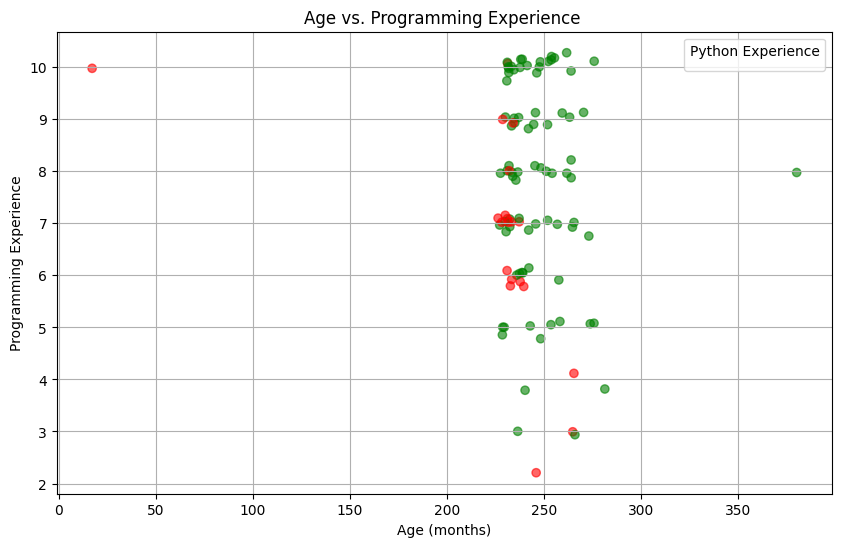

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# creating the graph
colors = {True: 'green', False: 'red'}
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_gtky['age'] + np.random.normal(0, 1, df_gtky.shape[0]),
                      df_gtky['prog_exp'] + np.random.normal(0, 0.1, df_gtky.shape[0]),
                      c=df_gtky['python'].map(colors), alpha=0.6)

# Add labels and title
plt.xlabel('Age (months)')
plt.ylabel('Programming Experience')
plt.title('Age vs. Programming Experience ')
plt.legend(handles=scatter.legend_elements()[0], labels=['Python: True', 'Python: False'], title='Python Experience')
plt.grid(True)

plt.show()